# Chapter 5

### Cat and Dogs Image Classification

Having to train an image-classification model using very little data is a common situation, which we’ll likely encounter in practice if we ever do computer vision in a professional context. 

A **few** samples can mean anywhere from a few hundred to a few tens of thousands of images. As a practical example, we’ll focus on classifying images as **dogs** or **cats**, in a dataset containing **4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs)**. 
* We’ll use 2,000 pictures for training
* 1,000 for validation, and 
* 1,000 for testing.

In this section, we’ll review one basic strategy to tackle this problem: 

* Training a new model from scratch using what little data we have. 
* We’ll start by naively training a small convnet on the 2,000 training samples, without any regularization, to set a baseline for what can be achieved. 
* This will get us to a classification accuracy of 71%. 
* At that point, the main issue will be **overfitting**. 
* Then we’ll introduce data augmentation, a powerful technique for mitigating overfitting in computer vision. 
* By using data augmentation, we’ll improve the network to reach an accuracy of 82%.
 
 
In the next section, we’ll review two more essential techniques for applying deep learning to small datasets (Transfer Learning): 

* Feature Extraction with a pretrained network (which will get us to an accuracy of 90% to 96%) and 
* Fine-tuning a pretrained network (this will get us to a final accuracy of 97%). 

Together, these three strategies;

1. Training a small model from scratch, 
2. Doing feature extraction using a pretrained model, and 
3. Fine-tuning a pretrained model—

will constitute our future toolbox for tackling the problem of performing image classification with small datasets.

### The relevance of deep learning for small-data problems

We’ll sometimes hear that deep learning only works when lots of data is available. This is valid in part: 
* One fundamental characteristic of deep learning is that it can find interesting features in the training data on its own, without any need for manual feature engineering, and this can only be achieved when lots of training examples are available. 
* This is especially true for problems where the input samples are very high dimensional, like images.

But what constitutes lots of samples is relative—relative to the size and depth of the
network we’re trying to train, for starters. 

It isn’t possible to train a convnet to solve a complex problem with just a few tens of samples, but a few hundred can potentially suffice if the model is small and well regularized and the task is simple. Because convnets learn local, translation-invariant features, they’re highly data efficient on perceptual problems. 

Training a convnet from scratch on a very small image dataset will still yield reasonable results despite a relative lack of data, without the need for any custom feature engineering. we’ll see this in action in this section.
 
 
What’s more, deep-learning models are by nature highly repurposable: we can take, say, an image-classification or speech-to-text model trained on a large-scale dataset and reuse it on a significantly different problem with only minor changes. 
* Specifically, in the case of computer vision, many pretrained models (usually trained on the **ImageNet dataset**) are now publicly available for download and can be used to bootstrap powerful vision models out of very little data.

### Downloading the data

The **Dogs vs. Cats** dataset that we’ll use isn’t packaged with Keras/Tensorflow. It was made available by Kaggle as part of a computer-vision competition in late 2013, back when convnets weren’t mainstream. 

We can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data (we’ll need to create a Kaggle account if we don’t already have one).

The pictures are medium-resolution color `JPEGs`. Figure below shows some examples

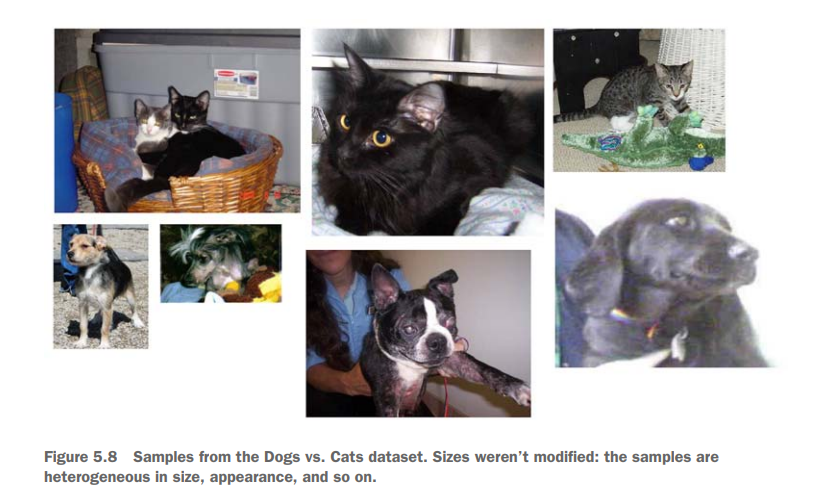

Unsurprisingly, the **dogs-versus-cats** Kaggle competition in 2013 was won by entrants who used convnets. The best entries achieved up to 95% accuracy. 

In this example, we’ll get fairly close to this accuracy, even though we’ll train our models on less than 10% of the data that was available to the competitors.

This dataset contains **25,000 images of dogs and cats (12,500 from each class)** and is **812 MB (compressed)**. After downloading and uncompressing it, we’ll create a new dataset containing three subsets: 
* a training set with 1,000 samples of each class, 
* a validation set with 500 samples of each class, and 
* a test set with 500 samples of each class.

### Copying images to training, validation, and test directories

In [5]:
import os, shutil # The shutil module offers a number of high-level operations on files and collections of files.
# In particular, functions are provided which support file copying and removal.

In [7]:
original_dataset_dir = 'kaggle_original_data/train'

In [8]:
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

In [9]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [10]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [11]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [12]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] # file names (fnames)
fnames[:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.4.jpg']

In [14]:
# Copies the first 1,000 cat images to train_cats_dir

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
# Copies the next 500 cat images to validation_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
# Copies the next 500 cat images to test_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
# Copying dog images to train, validation and test dog_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

To reconfirm , let’s count how many pictures are in each training split (train/validation/test):

In [18]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


So we do indeed have 

* 2,000 training images, 
* 1,000 validation images, and 
* 1,000 test images. 

Each split contains the same number of samples from each class: 
* This is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

###  Building a network

We’ll use the same general structure: the convnet will be a stack of alternated;

* Conv2D (with relu activation) and 
* MaxPooling2D layers.

But because we’re dealing with bigger images and a more complex problem, we’ll make our network larger, accordingly.  This serves both;to 
* To augment the capacity of the network and 
* To further reduce the size of the feature maps so they aren’t overly large when we reach the Flatten layer. 

Because we start from inputs of size `150 × 150` (a somewhat arbitrary choice), we end up with feature maps of size `7 × 7` just before the **Flatten layer**.

**NOTE:** The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from `148 × 148` to `7 × 7`). This is a pattern we’ll see in almost all convnets.

Because we’re attacking a **binary-classification** problem, we’ll end the network with a **single unit (a Dense layer of size 1)** and a **sigmoid activation**. This unit will encode the probability that the network is looking at one class or the other.

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

For the compilation step, we’ll go with the `RMSprop` **optimizer**, as usual. Because we ended the network with a **single sigmoid unit**, we’ll use `binary crossentropy` as the **loss**.

In [29]:
from tensorflow.keras import optimizers

In [34]:
# Configuring the model for training

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

### Data preprocessing

As we know by now, data should be formatted into appropriately preprocessed floating point tensors before being fed into the network. Currently, the data sits on a drive as **JPEG** files, so the steps for getting it into the network are roughly as follows:

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between `0` and `255`) to the [`0`, `1`] interval (as we know,neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Tensorflow/Keras has utilities to take care of these steps automatically. **Tensorflow/Keras** has a module with **image-processing** helper tools, located at `keras.preprocessing.image`. 

In particular, **it contains the class** `ImageDataGenerator`, which lets us quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. This is what we’ll use here.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255) # Rescales all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), # Resizes all images to 150 × 150
                                                    batch_size=20, 
                                                    class_mode='binary') # Because we use binary_crossentropy loss, we need binary labels.

Found 2000 images belonging to 2 classes.


In [42]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


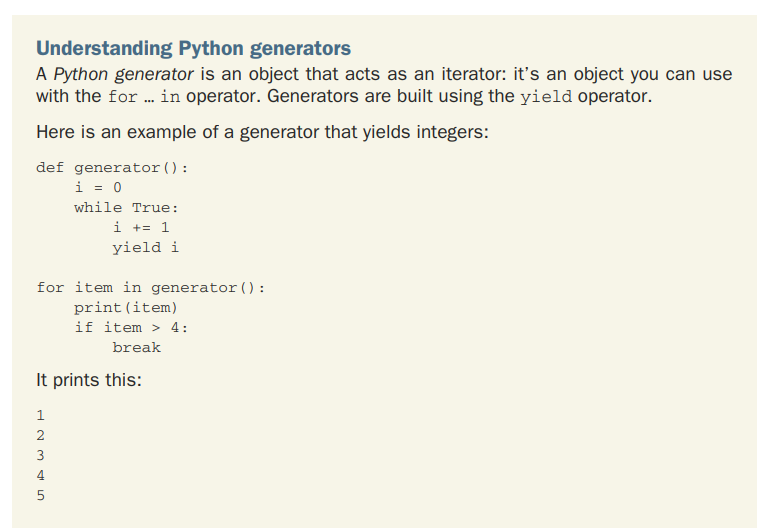

Let’s look at the output of one of these generators:

In [43]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Generators yields batches of `150 × 150` **RGB images** `(shape (20, 150, 150, 3))` and **binary labels** `(shape (20,))`. There are **20 samples** in each batch (the batch size).

**Note that** the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, we need to `break` the iteration loop at some point:

### Train the model

Let’s fit the model to the data using the generator. We do so using the `fit_generator` method;
* Equivalent of fit for data generators like this one. 
* It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. 
* Because the data is being generated endlessly, the **Tensorflow/Keras** model needs to know how many samples to draw from the generator before declaring an epoch over. 
    * This is the role of the `steps_per_epoch` argument: 
    * After having drawn `steps_per_epoch` batches from the generator—that is, after having run for `steps_per_epoch` gradient descent steps—the fitting process will go to the next epoch. 
    * In this case, batches are 20 samples, so it will take 100 batches until we see our target of 2,000 samples.

When using `fit_generator`, we can pass a `validation_data` argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. 

If we pass a generator as `validation_data`, then this generator is expected to yield batches of validation data endlessly; thus we should also specify the `validation_steps` argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [44]:
# Fitting the model using a batch generator

history = model.fit_generator(train_generator, steps_per_epoch=100, 
                              epochs=30, validation_data=validation_generator,
                              validation_steps=50)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 139s 1s/step - loss: 0.6885 - acc: 0.5358 - val_loss: 0.6774 - val_acc: 0.5610
Epoch 2/30
100/100 [==============================] - 103s 1s/step - loss: 0.6559 - acc: 0.6202 - val_loss: 0.6392 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 116s 1s/step - loss: 0.6338 - acc: 0.6457 - val_loss: 0.6065 - val_acc: 0.6480
Epoch 4/30
100/100 [==============================] - 179s 2s/step - loss: 0.5662 - acc: 0.7096 - val_loss: 0.5808 - val_acc: 0.6950
Epoch 5/30
100/100 [==============================] - 180s 2s/step - loss: 0.5408 - acc: 0.7341 - val_loss: 0.5907 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 179s 2s/step - loss: 0.5239 - acc: 0.7470 - val_loss: 0.5605 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 172s 2s/step - loss: 0.5047 - acc: 0.7419 - val_loss: 0.5679 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 171s 2s/step - 

It’s good practice to always save our models after training.

In [46]:
# Saving the model

model.save('cats_and_dogs_small_1.h5')

Let’s plot the loss and accuracy of the model over the training and validation data during training

In [24]:
import matplotlib.pyplot as plt

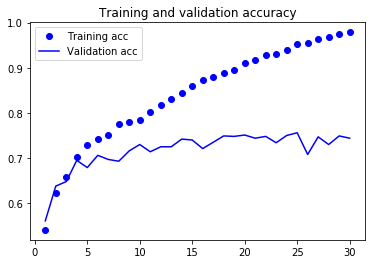

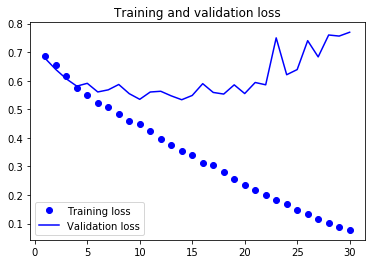

In [47]:
# Displaying curves of loss and accuracy during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. 
* The training accuracy increases linearly over time, until it reaches nearly 100%, whereas 
* The validation accuracy stalls at 70–72%.
* The validation loss reaches its minimum after only five epochs and then stalls, whereas
* The training loss keeps decreasing linearly until it reaches nearly 0.

Because we have relatively few training samples `(2,000)`, overfitting will be our number-one concern. We already know about a number of techniques that can help mitigate overfitting, such as 
* dropout and 
* weight decay (`L2` regularization).

We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: **data augmentation

###  Data augmentation

Overfitting is caused by having too few samples to learn from, unable
to train a model that can generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would
never overfit. 

Data augmentation takes the approach of generating more training data
from existing training samples, by augmenting the samples via a number of random
transformations that yield believable-looking images. The goal is that at training time,
our model will never see the exact same picture twice. This helps expose the model
to more aspects of the data and generalize better.
 
In **Tensorflow/Keras**, this can be done by configuring a number of random transformations to
be performed on the images read by the `ImageDataGenerator` instance. Let’s get
started with an example.

In [2]:
# Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

* `rotation_range` is a value in degrees `(0–180)`, a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Let’s look at the augmented images

In [3]:
# Displaying some randomly augmented training images

from tensorflow.keras.preprocessing import image # Module with imagepreprocessing utilities

In [19]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [20]:
img_path = fnames[3] # Chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150)) # Reads the image and resizes it

In [21]:
x = image.img_to_array(img) # Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Reshapes it to (1, 150, 150, 3)

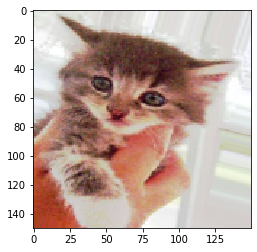

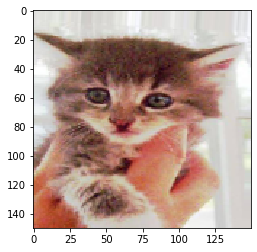

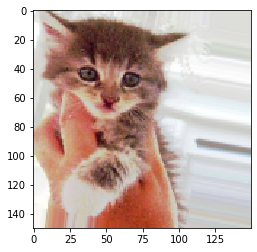

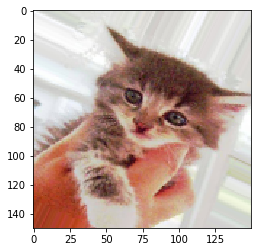

In [26]:
i=0

for batch in datagen.flow(x, batch_size=1): # Generates batches of randomly transformed images.
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break # Loops indefinitely, so we need to break the loop at some point!

plt.show()

If we train a new network using this **data-augmentation** configuration, the network
will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images.
* We can’t produce new information, we can only remix existing information. 

As such, this may not
be enough to completely get rid of overfitting. To further fight overfitting, we’ll also
add a **Dropout layer** to our model, right before the densely connected classifier.

In [30]:
# Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

Let’s train the network using data augmentation and dropout.

In [31]:
# Training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                   horizontal_flip=True,)

In [32]:
# Note that the validation data shouldn’t be augmented!

test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),
                                                    batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [34]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
                                                        batch_size=32,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [55]:
# Original code from book
# history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
#                               validation_data=validation_generator,validation_steps=50)

In [54]:
history = model.fit(train_generator,steps_per_epoch=60,epochs=30,
                              validation_data=validation_generator,validation_steps=30)

Epoch 1/30
60/60 [==============================] - 178s 3s/step - loss: 0.5795 - acc: 0.6959 - val_loss: 0.5581 - val_acc: 0.7083
Epoch 2/30
60/60 [==============================] - 179s 3s/step - loss: 0.5727 - acc: 0.6964 - val_loss: 0.5384 - val_acc: 0.7104
Epoch 3/30
60/60 [==============================] - 189s 3s/step - loss: 0.5621 - acc: 0.7106 - val_loss: 0.5543 - val_acc: 0.7073
Epoch 4/30
60/60 [==============================] - 192s 3s/step - loss: 0.5673 - acc: 0.7006 - val_loss: 0.5982 - val_acc: 0.6677
Epoch 5/30
60/60 [==============================] - 164s 3s/step - loss: 0.5654 - acc: 0.6954 - val_loss: 0.5347 - val_acc: 0.7292
Epoch 6/30
60/60 [==============================] - 198s 3s/step - loss: 0.5587 - acc: 0.7132 - val_loss: 0.5286 - val_acc: 0.7292
Epoch 7/30
60/60 [==============================] - 201s 3s/step - loss: 0.5475 - acc: 0.7138 - val_loss: 0.5228 - val_acc: 0.7312
Epoch 8/30
60/60 [==============================] - 201s 3s/step - loss: 0.5598 - a

In [56]:
# Saving the model

model.save('cats_and_dogs_small_2.h5')

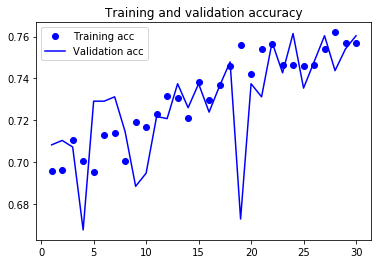

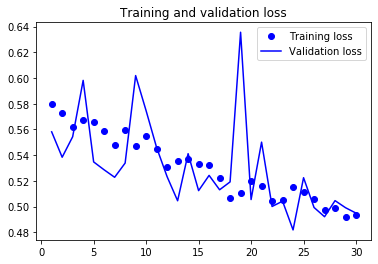

In [57]:
# Displaying curves of loss and accuracy during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, there is no overfitting: the training curves are closely tracking the validation curves. We now reach an accuracy of 82%, a 15% relative improvement
over the non-regularized model.

By using regularization techniques even further, and by tuning the network’s parameters (such as the number of filters per convolution layer, or the number of layers in
the network), we may be able to get an even better accuracy, likely up to 86% or 87%.

But it would prove difficult to go any higher just by training our own convnet from
scratch, because we have so little data to work with. As a next step to improve our
accuracy on this problem, we’ll have to use a pretrained model (Transfer Learning)